# Multiple Linear Regression

In the simple linear regression model between TV and sales, the accuracy, or the 'model fit', as measured by the R-squared was about 0.81. But when you brought in the radio and the newspaper variables along with TV, the R-squared increased to 0.91 and 0.83, respectively. 

**The R-squared value will always either increase or remain the same when you add more variables.** This is because you already have the predictive power of the previous variable; so, the R-squared value can definitely not go down. And a new variable, no matter how insignificant it might be, cannot decrease the value of the R-squared. **So, it seems that adding a new variable helps explain the variance in the data better.**

### Formulation of MLR
Extension of SLR, adds more factors/effects

#### Interpretation of the coefficients
Change in mean response, E(y) per unit increase in the variable when other predictors are held constant

### Moving from SLR to MLR - New Considerations

- Overfitting
- Muticollinearity
- Feature selection



However, some other aspects still remain the same:

- The model now fits a **hyperplane** instead of a line.
- Coefficients are still obtained by **minimising the sum of squared errors, the least squares criteria.**
- For inference, the assumptions from simple linear regression still hold: zero mean, independent and normally distributed error terms with constant variance.

#### Overfitting
- As you keep adding variables, the model may become far too **complex**.
- It may end up **memorising** the training data and, consequently, **fail to generalise**.
- A model is generally said to overfit when the **training accuracy is high while the test accuracy is very low.**

#### Multicollinearity
- Multicollinearity refers to the phenomenon of having **related predictor (independent)  variables** in the input data set. 
- In simple terms, in a model that has been built using several independent variables, some of these variables might be interrelated, due to which the presence of that variable in the model is redundant. 
- You **drop some of these related independent variables as a way of dealing with multicollinearity.**

- If independent variables are related, we cannot seperate the effects of each variable

#### Multicollinearity affects the following:
##### Interpretation
- Does “change in Y when all others are held constant” apply?

##### Inference 
- Coefficients swing wildly, signs can invert.
- Therefore, p-values are not reliable.

#### Multicollinearity does not affect the following:
- predictions, precision of the prediction
- goodness of fit statistics

#### Detecting Multicollinearity  : pairwise correlations of independent variables
- Scatter plots to visually inspect
- Correlations to quantify linear association (heap maps)

#### Detecting Multicollinearity  : Variance Inflation factor (VIF)
- Sometimes, pairwise correlations are not enough.
- Instead of just one variable, the independent variable may depend upon a combination of other variables.
- VIF calculates how well one independent variable is explained by all the other independent variables combined.



**VIF = 1/(1-R²)**

VIF of ith variable -> linear combination of the rest of the independent variables.

The common heuristic we follow for the VIF values is:
- greater than 10:  VIF value is definitely high, and the variable should be eliminated.
- greater than 5 :  Can be okay, but it is worth inspecting.
- less than 5: Good VIF value. No need to eliminate this variable.

#### Dealing with Multicollinearity

**Dropping variables**
- Drop the variable that is highly correlated with others.
- Pick the business interpretable variable.

**Creating a new variable** using the interactions of the older variables
- Add interaction features, i.e., features derived using some of the original features.

**Variable transformations**
- Principal component analysis

#### Feature selection
Selecting an **optimal set from a pool of given features**, many of which might be redundant, becomes an important task.

To get the optimal model, you can always try all the possible combinations of independent variables and see which model fits best. **2 power p models for p features**
But this method is time-consuming and infeasible. Hence, you need another method to get a decent model. This is where manual feature elimination comes in, wherein you:

- Build the model with all the features,
- Drop the features that are the least helpful in prediction (high p-value),
- Drop the features that are redundant (using correlations and VIF),
- Rebuild the model and repeat.

Note that the second and third steps go hand in hand, and the choice of which features to eliminate first is very subjective. 

Automated approach
- Top 'n' features : Recursive Feature elimination(RFE)
- Forward/ Backward/ Stepwise selection : based on AIC
- Regularization : Lasso

Balanced approach
- Use a combination of automated + manual selection 

You need to combine the manual approach and the automated one in order to get an optimal model relevant to the business. Hence, you first do an automated elimination (coarse tuning), and when you have a small set of potential variables left to work with, you can use your expertise and subjectivity to eliminate a few other features (fine tuning).

### Dealing with Categorical Variables

When you have a categorical variable with, say, **'n' levels** , the idea of **dummy variable creation** is to build **'n-1'** variables, indicating the levels. 

Example : Gender : Male, Female

Number of levels = 2. Create a dummy variable with n-1 levels -> 1
- Male -> 0
- Female -> 1

Y = β₀ + β₁X + error

- Female : Y = β₀ + β₁ + error
- Male : β₀ +  error

The creation of dummy variables to convert a categorical variable into a numeric variable is an important step in data preparation. Consider a case where a categorical variable is a factor with 22 levels. How many dummy variables will be required to represent this categorical variable while developing the linear regression model?

- N-1 dummy variables can be used to describe a categorical variable with N levels.

### Scaling the variables
- Ease of interpretation
- Faster convergence for gradient descent methods

**Scaling should be performed after removing the test set from the entire dataset**. You would not want to use a test set anywhere during the model-building part. The test set is kept aside and is only used to 'test' the model.


Note that **scaling just affects the coefficients** and none of the other parameters, such as t-statistic, F-statistic, p-values and R-squared.

The most popular methods for scaling:
1. Min-Max Scaling brings all the **data in the range of 0-1**
2. Standard Scaling: Standardisation brings all the data into a **standard normal distribution with mean 0 and standard deviation 1**

Min-Max Scaling x = (x-min(x)) / (max(x) - min(x))

Standardisation x = (x-mean(x)) / sd(x)

One disadvantage of normalization over standardization is that it loses some information in the data, especially about outliers.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
X = advertising['TV']
y = advertising['Sales']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [6]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [9]:
# Mean = 0 and standard deviation = 1

print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [10]:
import statsmodels.api as sm

In [11]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [12]:
# Check the parameters
lr_scaled.params

array([-2.63677968e-16,  9.03212773e-01])

In [13]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           1.52e-52
Time:                        11:56:09   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.637e-16      0.037  -7.22e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation
- Faster convergence of gradient descent

### Model Assessment and Comparison

 For multiple linear regression, you may build more than one model with different combinations of the independent variables. In such a case, you would also need to compare these models with one another to check which one yields optimal results. 

#### Selecting the best model - Trade off betweeen bias and variance

You need to maintain a **balance between keeping the model simple and explaining the highest variance** (which means that you would want to keep as many variables as possible). 

**Key idea** :  a model can be penalised for keeping a large number of predictor variables. 

#### Adjusted R²
The adjusted R² adjusts the value of R² such that a model with a larger number of variables is penalised.

**Adjusted R² = 1 - [(1-R²)(N-1) / (N-p-1)]**


Here, 
N is the sample size, meaning the number of rows you would have in the data set, and 
p is the number of predictor variables.

#### Akaike information criterion
AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

**AIC = n* log(RSS/n) + 2p**

Lower AIC is better. Penalty increases linearly with number of independent variables

#### Bayesian information criterion
It is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred.Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC

Suppose you built a model with some features. Now, you add another variable to the model. 
- **The R-squared value will either increase or remain the same.** The R-squared value always increases or remains the same with the addition of variables. It can never happen that an additional variable, no matter how insignificant, will decrease the value of R-squared.
- **The adjusted R-squared value may increase or decrease.** The key idea behind adjusted R-squared is that it penalises models for having a higher number of variables. Thus, if the value increases on the addition of a variable, we may conclude that that variable is significant, and vice-versa.




**Overfitting is more probable when : the number of datapoints is lower**
- Overfitting is a condition wherein the model is so complex that it ends up memorising almost all the datapoints on the train set. Hence, this condition is more probable if the number of datapoints is less, as the model passing through almost every point becomes easier.

VIF is a measure of how well a predictor variable is correlated with all the other variables, excluding the target variable

Suppose you were predicting the sales of a company using two variables, 'Social Media Marketing' and 'TV Marketing'. You found out that the correlation between these two variables is 0.9. 
 VIF = 1/ (1-0.9^2) = 5.26

Suppose you have 'n' categorical variables, each with 'm' levels. How many dummy variables would you need to represent all the levels of all the categorical variables?

Each of the dummy variables has 'm' levels. So, to represent one categorical variable, you would require (m-1) levels. Hence, to represent 'n' categorical variables, you would need **(m - 1) * n dummy variables**

After performing inferences on a linear model built with several variables, you concluded that the variable ‘r’ was almost described by other feature variables. This meant that the variable ‘r’ had a high VIF. If the variable is being described well by the rest of the feature variables, it means that it has a high VIF, meaning it is redundant in the presence of the other variables.

# Multiple Linear Regression in Python

**Problem Statement**

Consider that a real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:
- To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
- To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
- To know the accuracy of the model, i.e. how well do these variables predict the house prices
    

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [14]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd

In [16]:
housing = pd.read_csv("Housing.csv")

In [17]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
housing.shape

(545, 13)

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [20]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [21]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious **multicollinearity** going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numerical Variables

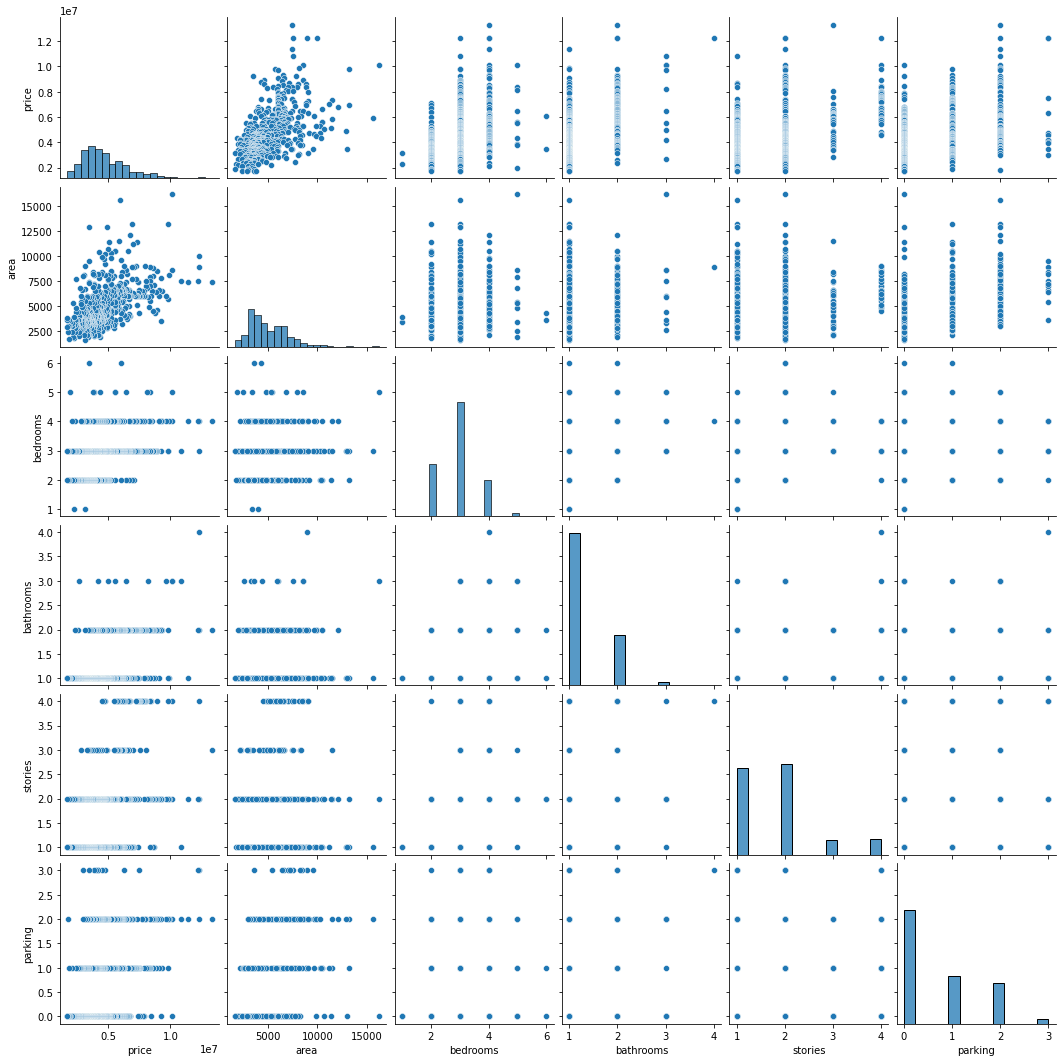

In [23]:
sns.pairplot(housing)
plt.show()

- postive correlation between price and area
- higher the number of bedrooms, higher the price , this seems to be the relationship for 2,3,4 bedrooms

#### Visualising Categorical Variables
Let's make a boxplot for some of these variables.

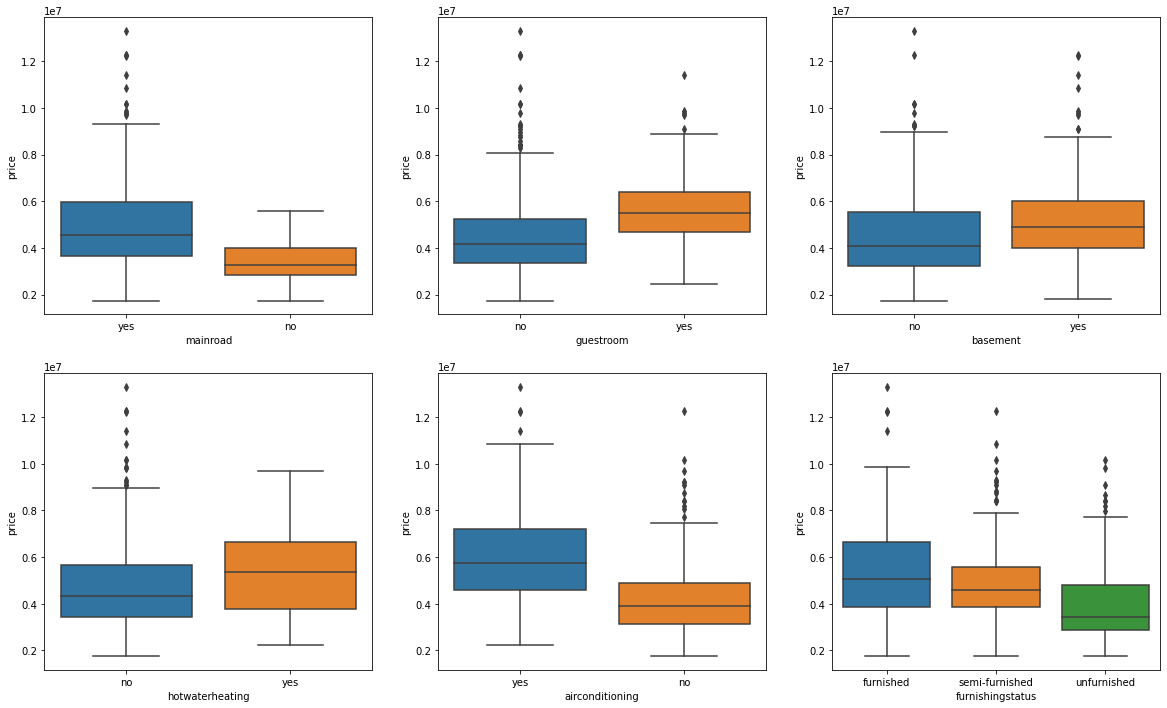

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

Houses on the mainroad, have guestroom, have basement, have hot water heating , air conditioning have higher prices than those without these services, there are significant difference in prices 

## Step 3: Data Preparation

#### Encoding
- You can see that your dataset has many columns with values as 'Yes' or 'No'. But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.
- Convert categorical variables to dummy variables

In [25]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [27]:
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [32]:
name = ['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
response = ['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']

In [33]:
df = pd.DataFrame({'Name': name,'Response': response})
df.head()

,Name,Response
0,Reetesh,No
1,Shruti,Maybe
2,Kaustubh,yes
3,Vikas,Yes
4,Mahima,maybe


In [39]:
# map function  - define a dictionary to map the values


df['Response']=df['Response'].map({"Yes": 1.0 , "yes": 1.0, "No": 0.0, "no": 0.0, "Maybe": 0.5 , "maybe": 0.5})
df.head()

,Name,Response
0,Reetesh,NaN
1,Shruti,NaN
2,Kaustubh,NaN
3,Vikas,NaN
4,Mahima,NaN


In [40]:
name = ['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
response = ['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']
df = pd.DataFrame({'Name': name,'Response': response})

def response_map(x):
    return x.map({"Yes": 1.0 , "yes": 1.0, "No": 0.0, "no": 0.0, "Maybe": 0.5 , "maybe": 0.5})

df[['Response']] = df[['Response']].apply(response_map)
df.head()

,Name,Response
0,Reetesh,0.0
1,Shruti,0.5
2,Kaustubh,1.0
3,Vikas,1.0
4,Mahima,0.5


### Dummy Variables
The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [41]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [42]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [44]:
# Let's drop the first column from status df using 'drop_first = True'
# dropping redundant dummy variable
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [45]:
# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

In [46]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [47]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [48]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Scaling of variables is an important step because the variable ‘area’ is on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that was encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable(that they have a comparable scale)

If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Two popular rescaling methods- Min-Max scaling and Standardisation (mean=0 and sigma=1). The advantage of Standardisation over the other is that it doesn't compress the data between a particular range as in Min-Max scaling. This is useful, especially if there is are extreme data point (outlier).

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# (x - xmin) / (xmax - xmin)
# value between 0 and 1

In [52]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [53]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [54]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


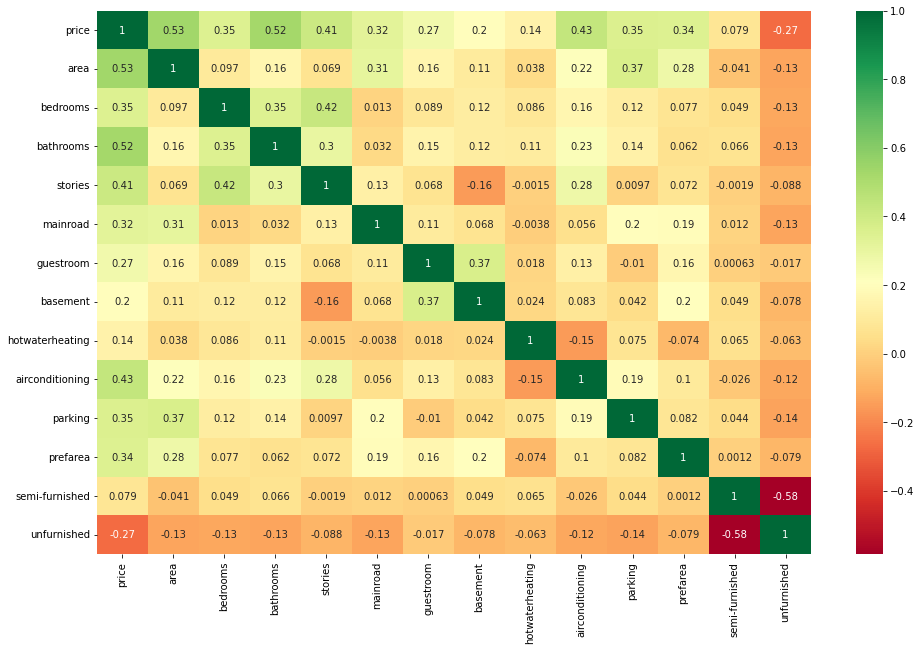

In [61]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

 `area` seems to the correlated to `price` the most.